In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

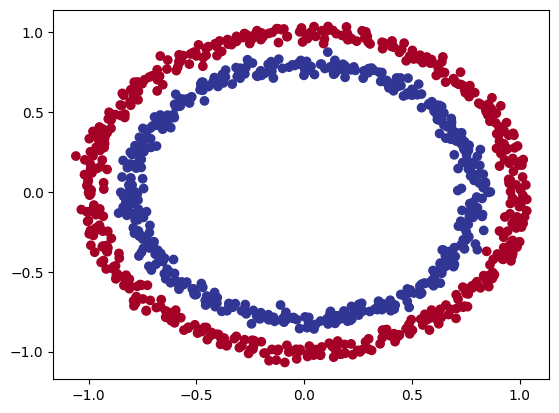

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})

import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [ ]:
import sklearn
model = tf.keras.Sequential([
      tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
      tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
      tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

model.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history = model.fit(X, y, epochs=100, verbose=0)

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.693566,0.505
1,0.691463,0.513
2,0.690304,0.532
3,0.689461,0.528
4,0.688390,0.563
...,...,...
95,0.302656,0.975
96,0.297398,0.975
97,0.293538,0.975
98,0.289706,0.978


<Axes: >

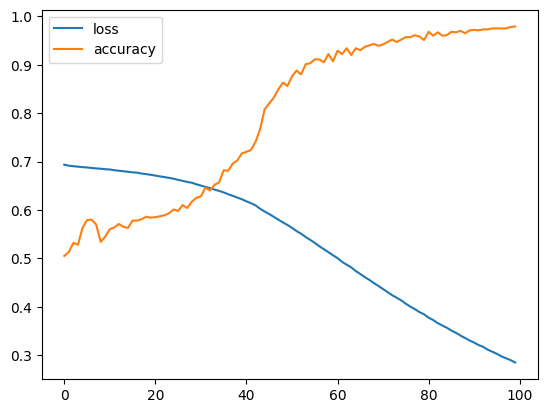

In [ ]:
pd.DataFrame(history.history).plot()

### Finding the best learning rate

In [ ]:
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

In [ ]:
model_adjustLR = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu", input_shape = [2]),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_adjustLR.compile(loss = tf.keras.losses.binary_crossentropy,
                       optimizer = tf.keras.optimizers.Adam(),
                       metrics = ["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch/20))

history = model_adjustLR.fit(X_train,
                             y_train,
                             epochs = 100,
                             callbacks = [lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7286 - accuracy: 0.4913 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7257 - accuracy: 0.4900 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7227 - accuracy: 0.4950 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7196 - accuracy: 0.4988 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7164 - accuracy: 0.4963 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7133 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7100 - accuracy: 0.5000 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7069 - accuracy: 0.5088 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,lr
0,0.728578,0.49125,0.000100
1,0.725743,0.49000,0.000112
2,0.722682,0.49500,0.000126
3,0.719618,0.49875,0.000141
4,0.716385,0.49625,0.000158
...,...,...,...
95,0.748455,0.50125,5.623413
96,0.774007,0.49125,6.309574
97,0.897521,0.46625,7.079458
98,0.785153,0.48375,7.943282


<Axes: >

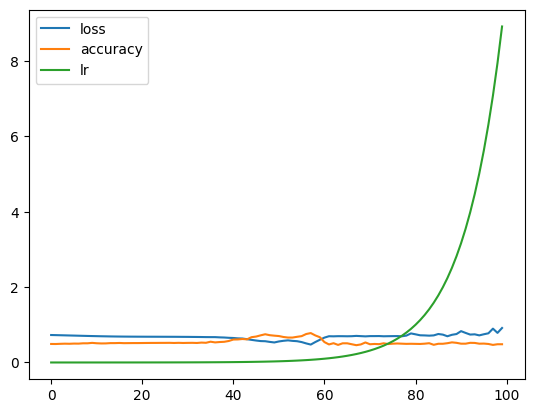

In [ ]:
pd.DataFrame(history.history).plot()

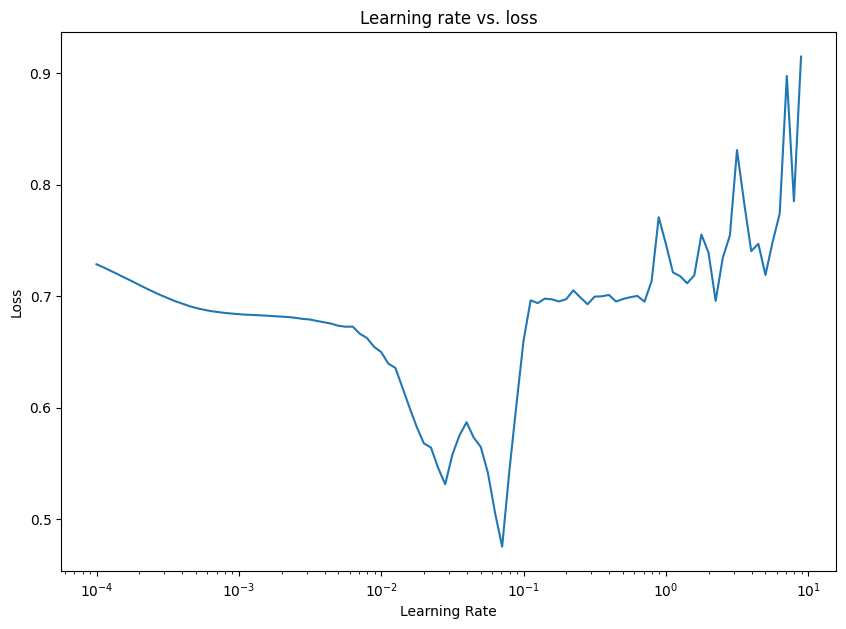

In [ ]:
# Plot the learning rate versus the loss

plt.figure(figsize=(10, 7))
plt.semilogx(history.history["lr"], history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [ ]:
# lowest possition is important
# like 10^-2

In [ ]:
model_adjust = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu", input_shape = [2]),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_adjust.compile(loss = tf.keras.losses.binary_crossentropy,
                     optimizer = tf.keras.optimizers.Adam(learning_rate = 10 ** -2),
                     metrics = ["accuracy"])

In [ ]:
model_adjust.fit(X_train,
                 y_train,
                 epochs = 100)

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.7163 - accuracy: 0.4938
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6888 - accuracy: 0.4925
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6799 - accuracy: 0.5225
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6701 - accuracy: 0.5925
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6605 - accuracy: 0.6200
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6546 - accuracy: 0.6025
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6467 - accuracy: 0.6237
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6311 - accuracy: 0.6313
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6146 - accuracy: 0.6712
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5968 - accuracy: 0.6775
Epoch 11/

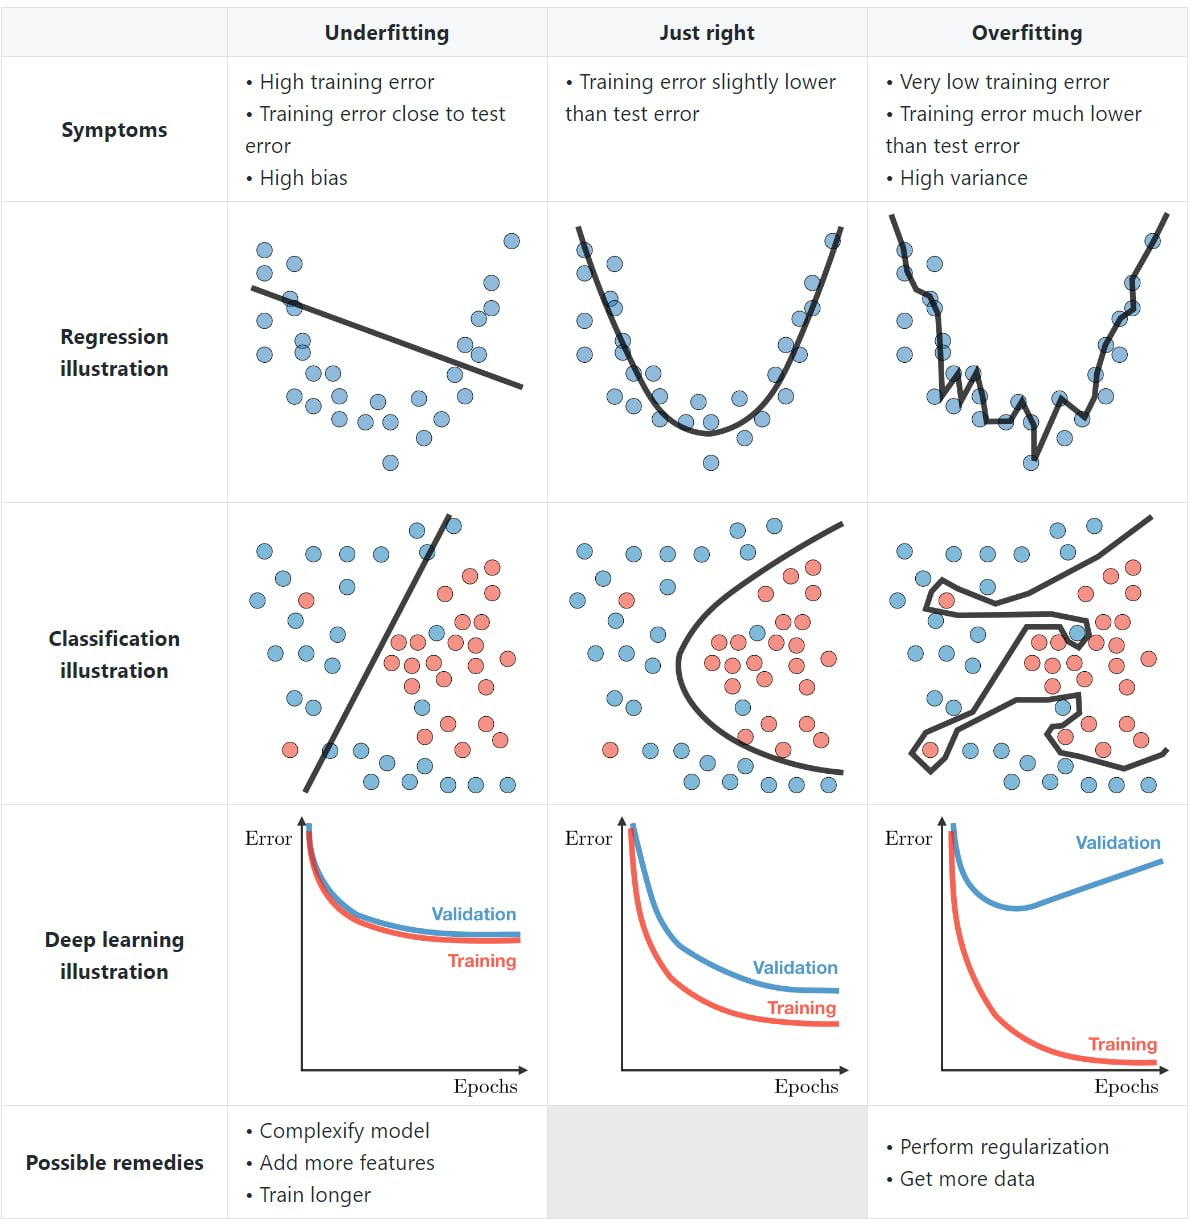

## Regularizations Method
####tf.keras.regularizers.L1

####tf.keras.regularizers.L2

```

i.e.

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1

# Create a Sequential model
model = Sequential()

# Add a Dense layer with L1 regularization
model.add(Dense(64, activation='relu', kernel_regularizer=l1(0.01), input_shape=(input_dim,)))
# Here, 0.01 is the L1 regularization strength.

# Add more layers as needed
model.add(Dense(32, activation='relu', kernel_regularizer=l1(0.01)))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

```

#### tf.keras.layers.Dropout()

```
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Create a Sequential model
model = Sequential()

# Add a Dense layer
model.add(Dense(64, activation='relu', input_shape=(input_dim,)))

# Add a dropout layer
model.add(Dropout(0.5))
# Here, 0.5 is the dropout rate, which means 50% of the neurons will be dropped out during training.

# Add more layers as needed
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# You can now train the model using your dataset, X_train and y_train
# model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)
```



#### Other Regularization:



*   Data Augmentation

*   Early Stopping


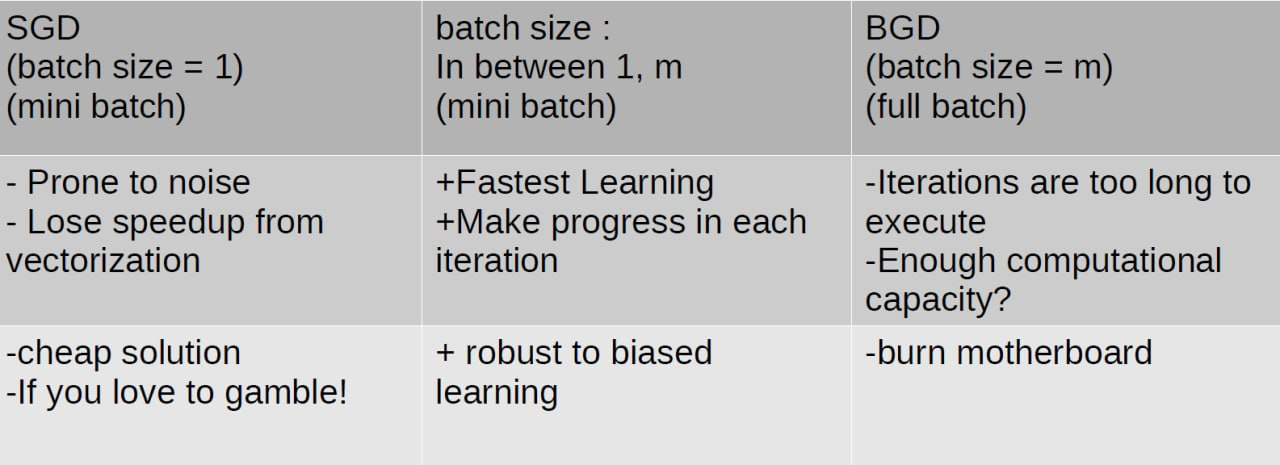

### Momentum

```
tf.keras.optimizers.SGD(
    learning_rate = 0.01,
    momentum = ...,
    ...
    ...
)
```
**Effect on Optimization**: Momentum helps optimization algorithms navigate regions of the loss surface that have local minima or flat areas. It allows the optimization process to "break free" from these local minima and continue searching for a better solution. In essence, it adds inertia to the optimization process, allowing it to push through regions with small gradients and reach a more suitable minimum.

0.9: A momentum value of 0.9 is a common default choice and is often a good starting point. It tends to work well for a wide range of tasks and datasets. Many machine learning frameworks use this value as a default.

0.99: A higher momentum value, such as 0.99, can be used when the optimization process needs more aggressive momentum. This can be beneficial when dealing with noisy or sparse gradients. However, very high momentum values can lead to overshooting and instability in some cases.

0.5 to 0.8: Lower momentum values, in the range of 0.5 to 0.8, may be suitable for certain optimization scenarios, especially when dealing with highly non-convex loss surfaces or when you want to reduce the risk of overshooting local minima.



### RMSprop and Adam
```
tf.keras.optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    weight_decay=None,
    ...
)
```
RMS + Momentum = Adam



```
tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    weight_decay=None,
    ...
)
```






### Learning Rate Decay:
Start with bigger steps, decay rate as cost function convereges through the minimum

# Tuning Process:

### Most Important

*   learning parameter α
------------------------------------------------
### Usually Same

*   Momentum β -----------> 0.9 good default
*   beta_1, beta_2 and epsilon  ------------------> 0.9, 0.999, 10^-8
------------------------------------------------
### Important

* \# Layers
* \# Hidden Units
* Learning rate decay
------------------------------------------------

### Important...

* mini_batch size: Use 2^n usually 16 and 32






### Batch Normalization

CNN example
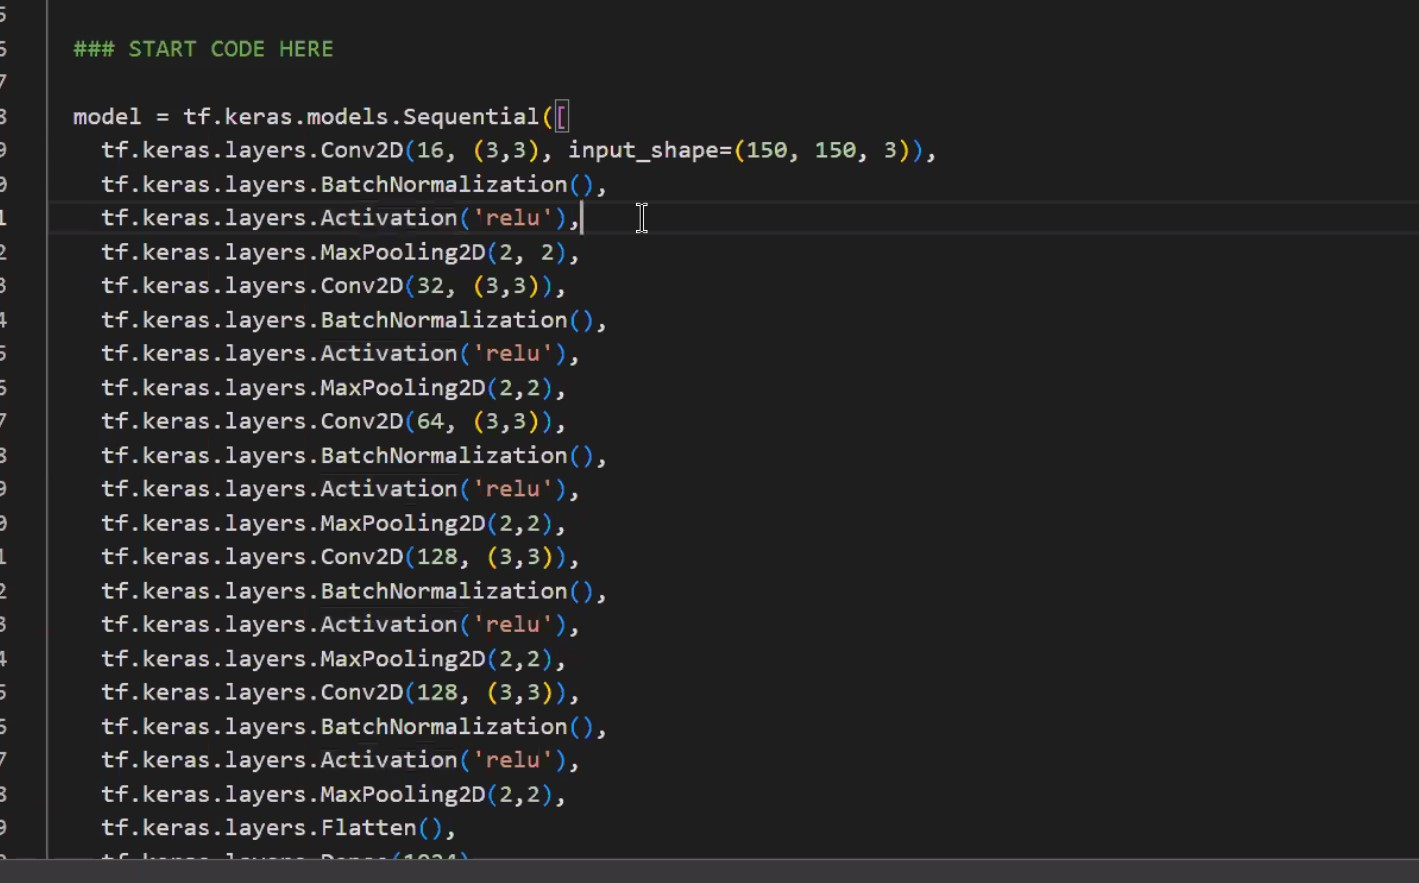


**Batch normalization (BatchNorm) is primarily known for addressing the problem of vanishing gradients**

Vanishing gradients are typically associated with difficulties in training deep neural networks, but they are more commonly linked to issues like slow convergence, difficulties in capturing long-term dependencies, and poor optimization. While vanishing gradients can indirectly contribute to underfitting in some cases, it's not the direct cause of underfitting.